In [ ]:
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Define the list of accounts to scrape
accounts = ["elonmusk", "BillGates", "sundarpichai", "tim_cook", "JeffBezos", "technology", "karaswisher", \
                       "ChuckRobbins", "ajassy", "smithmegan", "emilychangtv", \
                       "mollywood", "AndrewYNg", "reshmasaujani", "jack", "marissamayer", \
                       "kevinrose", "biz", "ev", "anildash", "levie"]



def get_tweets_for_accounts(accounts):
    dfs = []
    for account in accounts:
        tweets_list = []
        query = f'from:{account}'
        for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
            if i > 99:
                break
            tweets_list.append([account, tweet.id, tweet.date, tweet.content])
        df = pd.DataFrame(tweets_list, columns=['account', 'id', 'date', 'content'])
        dfs.append(df)
    return pd.concat(dfs)

In [ ]:
def collect_twitter_data(accounts):
    results = []
    for account in accounts:
        try:
            # Create a query string to search for the account's profile information
            query = f"from:{account}"

            # Use sntwitter to search for the tweets matching the query
            tweets = sntwitter.TwitterSearchScraper(query).get_items()

            # Parse the tweets and extract the account's profile information
            for tweet in tweets:
                data = {}
                data["Account"] = account
                data["Followers"] = tweet.user.followersCount
                data["Following"] = tweet.user.friendsCount
                data["Posts"] = tweet.user.statusesCount
                data["Location"] = tweet.user.location
                # data["Verified"] = tweet.user.verified
                # data["Default Profile"] = tweet.user.defaultProfile
                # data["Default Profile Image"] = tweet.user.defaultProfileImage
                results.append(data)

        except Exception as e:
            print(f"Error collecting data for account {account}: {str(e)}")

    # Convert the results to a pandas DataFrame
    df = pd.DataFrame(results)
    return df

In [ ]:
tweets = get_tweets_for_accounts(accounts)
tweets

<ipython-input-2-068fddaf67b9>:20: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list.append([account, tweet.id, tweet.date, tweet.content])
<ipython-input-2-068fddaf67b9>:20: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list.append([account, tweet.id, tweet.date, tweet.content])
<ipython-input-2-068fddaf67b9>:20: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list.append([account, tweet.id, tweet.date, tweet.content])
<ipython-input-2-068fddaf67b9>:20: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list.append([account, tweet.id, tweet.date, tweet.content])
<ipython-input-2-068fddaf67b9>:20: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list.append([account, tweet.id, tweet.date, tweet.content])
<ipython-input-2-068fddaf67b9>:20: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list

account                   id                      date  \
0   elonmusk  1647355027151896576 2023-04-15 21:43:39+00:00   
1   elonmusk  1647353787835637763 2023-04-15 21:38:44+00:00   
2   elonmusk  1647352347608207360 2023-04-15 21:33:00+00:00   
3   elonmusk  1647352121363161088 2023-04-15 21:32:06+00:00   
4   elonmusk  1647349297220812802 2023-04-15 21:20:53+00:00   
..       ...                  ...                       ...   
95     levie  1619237280773992449 2023-01-28 07:33:46+00:00   
96     levie  1619234978457591809 2023-01-28 07:24:37+00:00   
97     levie  1619233938383466501 2023-01-28 07:20:29+00:00   
98     levie  1619232208971259905 2023-01-28 07:13:37+00:00   
99     levie  1619231378251616256 2023-01-28 07:10:19+00:00   

                                              content  
0                                     @ShitpostGate 🤣  
1                                @KnowledgeArchiv Yes  
2                @shellenberger True. Wish it wasn’t.  
3   @KnowledgeArchiv Tolkien barely survived. Boli...  
4                         Yay! Nice work Dragon Team!  
..                                                ...  
95  @cjbcreighton @LyinTed1337 @NycMsk @can I don’...  
96  @cjbcreighton @LyinTed1337 @NycMsk @can I disa...  
97  @chrissignore Why don’t we just not give steep...  
98  @chrissignore Why is there no excess cash? Buy...  
99  @chrissignore 😜 ok but that didn’t answer the ...  

[2100 rows x 4 columns]

In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   account  2100 non-null   object             
 1   id       2100 non-null   int64              
 2   date     2100 non-null   datetime64[ns, UTC]
 3   content  2100 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 82.0+ KB


In [ ]:
accounts_info = collect_twitter_data(accounts)

In [ ]:
accounts_info

Empty DataFrame
Columns: []
Index: []

In [ ]:
import networkx as nx

# Create an empty graph
G = nx.Graph()

import re

# Iterate over the rows in the DataFrame
for index, row in tweets.iterrows():
    # Extract the account name from the tweet content
    account = row['account']
    content = row['content']
    mentioned_accounts = re.findall(r'@(\w+)', content)
    
    # Add the source node (the account that posted the tweet)
    G.add_node(account)
    
    # Add the target nodes (the accounts that were mentioned in the tweet)
    for mentioned_account in mentioned_accounts:
        G.add_node(mentioned_account)
        
        # Add the edge from the source account to the mentioned account
        G.add_edge(account, mentioned_account)
        
    # Check if the tweet is a retweet
    if content.startswith('RT @'):
        # Extract the original account name from the tweet content
        retweeted_account = re.findall(r'^RT\s+@(\w+):', content)[0]
        
        # Add the target node (the original account that was retweeted)
        G.add_node(retweeted_account)
        
        # Add the edge from the source account to the retweeted account
        G.add_edge(account, retweeted_account)

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size and edge length parameters
fig, ax = plt.subplots(figsize=(100, 100))
pos = nx.spring_layout(G) #, k=0.5, iterations=5)

# Create a dictionary of node colors
node_colors = {node: 'red' for node in ["elonmusk", "BillGates", "sundarpichai", "tim_cook", "JeffBezos", "technology", "karaswisher", \
                       "ChuckRobbins", "ajassy", "smithmegan", "emilychangtv", \
                       "mollywood", "AndrewYNg", "reshmasaujani", "jack", "marissamayer", \
                       "kevinrose", "biz", "ev", "anildash", "levie"]}

# Draw the graph
nx.draw(G, pos, ax=ax, with_labels=True, node_size=3000, node_color=[node_colors.get(node, 'lightblue') for node in G.nodes()]) #, node_color='lightblue', node_size=1000, font_size=16, font_weight='bold', width=3, edge_color='gray')

# Show the graph
plt.show()

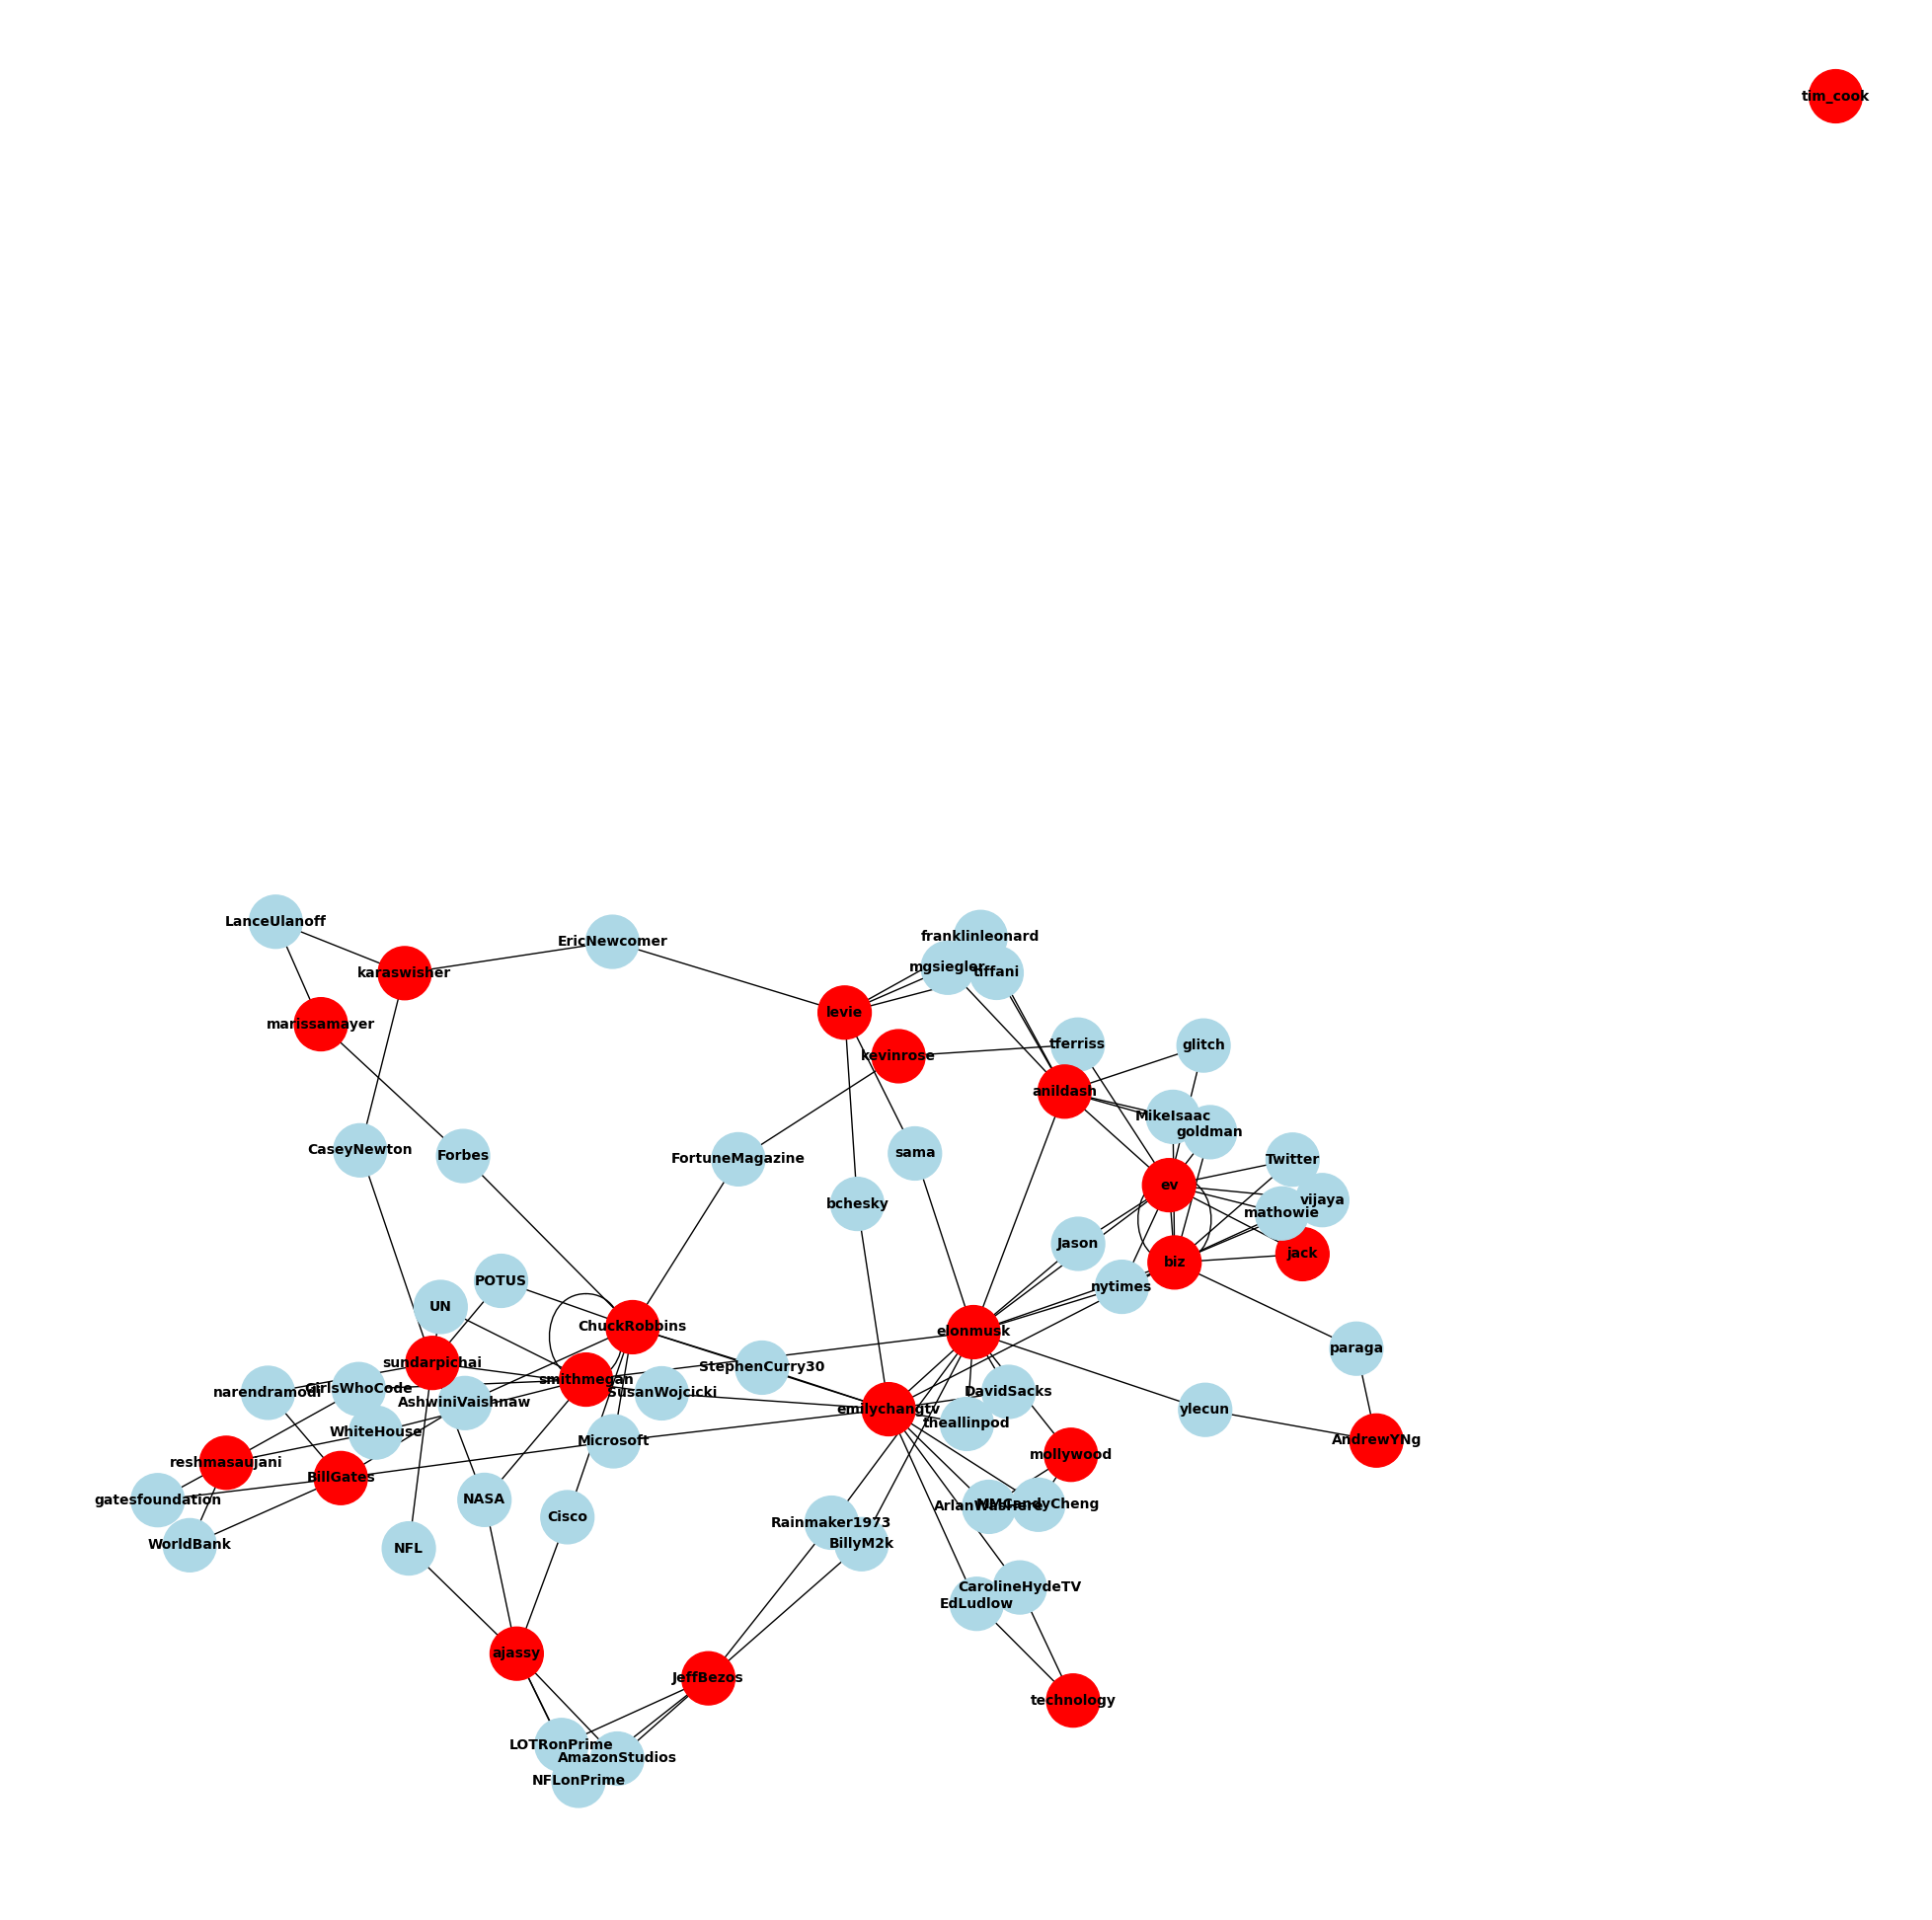

In [ ]:
# Get a list of nodes with degree 1
nodes_to_remove = [node for node, degree in dict(G.degree()).items() if degree == 1]

# Remove the nodes from the graph
G_filtered = G.copy()
G_filtered.remove_nodes_from(nodes_to_remove)

# Create a dictionary of node colors
node_colors = {node: 'red' for node in ["elonmusk", "BillGates", "sundarpichai", "tim_cook", "JeffBezos", "technology", "karaswisher", \
                       "ChuckRobbins", "ajassy", "smithmegan", "emilychangtv", \
                       "mollywood", "AndrewYNg", "reshmasaujani", "jack", "marissamayer", \
                       "kevinrose", "biz", "ev", "anildash", "levie"]}

# Draw the filtered graph
fig, ax = plt.subplots(figsize=(25, 25))
pos = nx.spring_layout(G_filtered)
nx.draw(G_filtered, pos, with_labels=True, node_size=1500, font_size=10, font_weight='bold', node_color=[node_colors.get(node, 'lightblue') for node in G_filtered.nodes()])

# Show the graph
plt.show()

In [ ]:
# Compute the degree centrality and betweenness centrality of each node
deg_centrality = nx.degree_centrality(G)
betw_centrality = nx.betweenness_centrality(G)

# Print the top 5 nodes for each measure
print("Top 5 nodes by degree centrality:")
for node, score in sorted(deg_centrality.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{node}: {score}")

print('\n \n')

print("Top 5 nodes by betweenness centrality:")
for node, score in sorted(betw_centrality.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{node}: {score}")

print('\n \n')

# Calculate the PageRank centrality
pagerank_centrality = nx.pagerank(G, max_iter=100)

# Get the top 5 nodes with the highest PageRank centrality scores
top_nodes = sorted(pagerank_centrality, key=pagerank_centrality.get, reverse=True)[:5]

# Print the top 5 nodes
print("Top 5 nodes based on PageRank: ", top_nodes)

Top 5 nodes by degree centrality:
smithmegan: 0.09054487179487179
emilychangtv: 0.07532051282051282
anildash: 0.07532051282051282
jack: 0.0689102564102564
ChuckRobbins: 0.06810897435897435

 

Top 5 nodes by betweenness centrality:
elonmusk: 0.45163769162038014
emilychangtv: 0.3135929089062773
smithmegan: 0.24785212379062524
ChuckRobbins: 0.23176049973893478
ev: 0.18702367009679483

 

Top 5 nodes based on PageRank:  ['smithmegan', 'anildash', 'emilychangtv', 'jack', 'kevinrose']


In [ ]:
'''

ChatGPT:

Centrality measures in social network analysis can be used to identify different types of influencers in a network.
The three most commonly used centrality measures are degree centrality, betweenness centrality, and eigenvector centrality.

Here's a brief explanation of each measure:

Degree centrality: This measures how many edges (i.e., connections) a node has.
Nodes with a high degree centrality are often called "hubs" because they are highly connected to other nodes in the network.
These nodes can be influential because they can spread information or resources more efficiently than nodes with low degree centrality.

Betweenness centrality: This measures how often a node lies on the shortest path between pairs of other nodes in the network.
Nodes with a high betweenness centrality are often called "brokers" or "gatekeepers" because they control the flow of information or resources
between different parts of the network. These nodes can be influential because they can act as a bottleneck or a bridge between different groups of nodes.

Eigenvector centrality: This measures a node's importance based on the importance of its neighbors.
Nodes with high eigenvector centrality are connected to other nodes with high eigenvector centrality,
which gives them a higher influence in the network. These nodes can be influential because they are well-connected to other influential nodes.

To identify influencers in a social network, you can calculate the centrality measures for each node and compare them across different measures.
For example, a node with a high degree centrality but low betweenness centrality may be influential within a particular group or community
but not well-connected to other groups. A node with a high betweenness centrality but low degree centrality may be influential 
because of their position as a broker or gatekeeper, but they may not have many direct connections to other nodes.
A node with high eigenvector centrality may be influential because they are well-connected to other influential nodes.

It's important to note that different people can have different centrality scores in a network because of a variety of factors,
such as their social status, their profession, or their communication skills.
For example, a celebrity or a politician may have a high degree centrality because they have a large number of followers, 
while a journalist or an expert in a particular field may have a high betweenness centrality because they are frequently cited by other people in the network.

To identify different types of influencers, you can use a combination of centrality measures and other network analysis techniques.
For example, you can use community detection algorithms to identify groups of nodes that are densely connected to each other, 
and then use centrality measures to identify influential nodes within each group. You can also use clustering algorithms to identify nodes 
that are similar to each other in terms of their connections and attributes, and then use centrality measures to identify influential nodes within each cluster. 
The key is to use a variety of techniques to identify influencers based on different criteria,
and to interpret the results in the context of the network and its social dynamics.


'''

'\n\nCentrality measures in social network analysis can be used to identify different types of influencers in a network.\nThe three most commonly used centrality measures are degree centrality, betweenness centrality, and eigenvector centrality.\n\nHere\'s a brief explanation of each measure:\n\nDegree centrality: This measures how many edges (i.e., connections) a node has.\nNodes with a high degree centrality are often called "hubs" because they are highly connected to other nodes in the network.\nThese nodes can be influential because they can spread information or resources more efficiently than nodes with low degree centrality.\n\nBetweenness centrality: This measures how often a node lies on the shortest path between pairs of other nodes in the network.\nNodes with a high betweenness centrality are often called "brokers" or "gatekeepers" because they control the flow of information or resources\nbetween different parts of the network. These nodes can be influential because they ca

In [ ]:
!pip install python-louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from networkx.algorithms import community

# Perform community detection
louvain_communities = community.greedy_modularity_communities(G)

# Assign a unique color to each community
community_colors = {}
for i, comm in enumerate(louvain_communities):
    for node in comm:
        community_colors[node] = i

# Compute degree centrality for each node
deg_centrality = nx.degree_centrality(G)

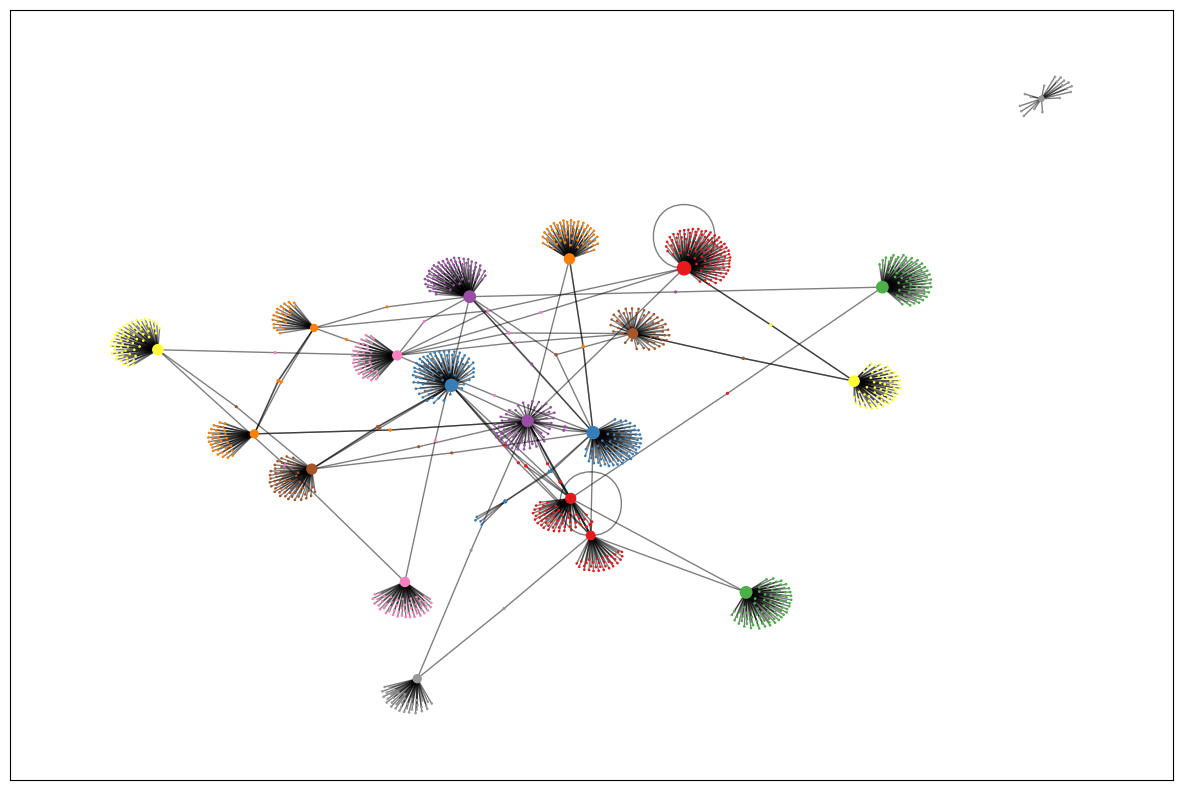

In [ ]:
# Draw the graph with nodes colored by community membership and sized by degree centrality
fig, ax = plt.subplots(figsize=(15, 10))
pos = nx.spring_layout(G, scale=2)
node_colors = [community_colors[node] for node in G.nodes()]
node_sizes = [deg_centrality[node]*1000 for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.Set1, node_size=node_sizes)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [ ]:
from collections import defaultdict

# Calculate degree centrality for each community
centrality_by_community = defaultdict(dict)
for i, community in enumerate(louvain_communities):
    subgraph = G.subgraph(community)
    degree_centrality = nx.degree_centrality(subgraph)
    for node, centrality in degree_centrality.items():
        centrality_by_community[i][node] = centrality

# Print top 5 nodes by degree centrality for each community
for i, community_centrality in centrality_by_community.items():
    sorted_nodes = sorted(community_centrality, key=community_centrality.get, reverse=True)
    top_5_nodes = sorted_nodes[:5]
    print(f"Community {i}: Top 5 nodes by degree centrality: {top_5_nodes}")

Community 0: Top 5 nodes by degree centrality: ['smithmegan', 'lauriewallmark', 'MichaelHillCHQ', 'jovialjoy', 'POTUS44']
Community 1: Top 5 nodes by degree centrality: ['ev', 'biz', 'nytimes', 'Twitter', 'mathowie']
Community 2: Top 5 nodes by degree centrality: ['emilychangtv', 'technology', 'EdLudlow', 'CarolineHydeTV', 'FrancesHaugen']
Community 3: Top 5 nodes by degree centrality: ['anildash', 'fmanjoo', 'zaheerali', 'jrdorkin', 'Jahwehsus']
Community 4: Top 5 nodes by degree centrality: ['jack', 'ryansogden', 'pmarca', 'Nostr_Ostrich', 'CitizenPleb']
Community 5: Top 5 nodes by degree centrality: ['kevinrose', 'alexarnault', 'akastevey_', 'konger_eth', 'fengnfts']
Community 6: Top 5 nodes by degree centrality: ['ChuckRobbins', 'CiscoPoland', 'GPTW_Spain', 'ASpirlet', 'ecoyuri']
Community 7: Top 5 nodes by degree centrality: ['elonmusk', 'TrungTPhan', 'FloridaState', 'CommunityNotes', 'tsrandall']
Community 8: Top 5 nodes by degree centrality: ['JeffBezos', 'ajassy', 'AmazonStudio

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

# Convert node labels to integers
mapping = dict(zip(G.nodes(), range(len(G.nodes()))))
G = nx.relabel_nodes(G, mapping)

# Perform clustering using k-means algorithm
kmeans = KMeans(n_clusters=2)
X = np.array(list(nx.degree_centrality(G).values())).reshape(-1, 1)
kmeans.fit(X)
labels = kmeans.labels_

# Calculate degree centrality for each node
degree_centrality = nx.degree_centrality(G)

# Analyze degree centrality for nodes in each cluster
cluster1_nodes = [node for node in G.nodes() if labels[node] == 0]
cluster2_nodes = [node for node in G.nodes() if labels[node] == 1]
cluster1_centrality = [degree_centrality[node] for node in cluster1_nodes]
cluster2_centrality = [degree_centrality[node] for node in cluster2_nodes]

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


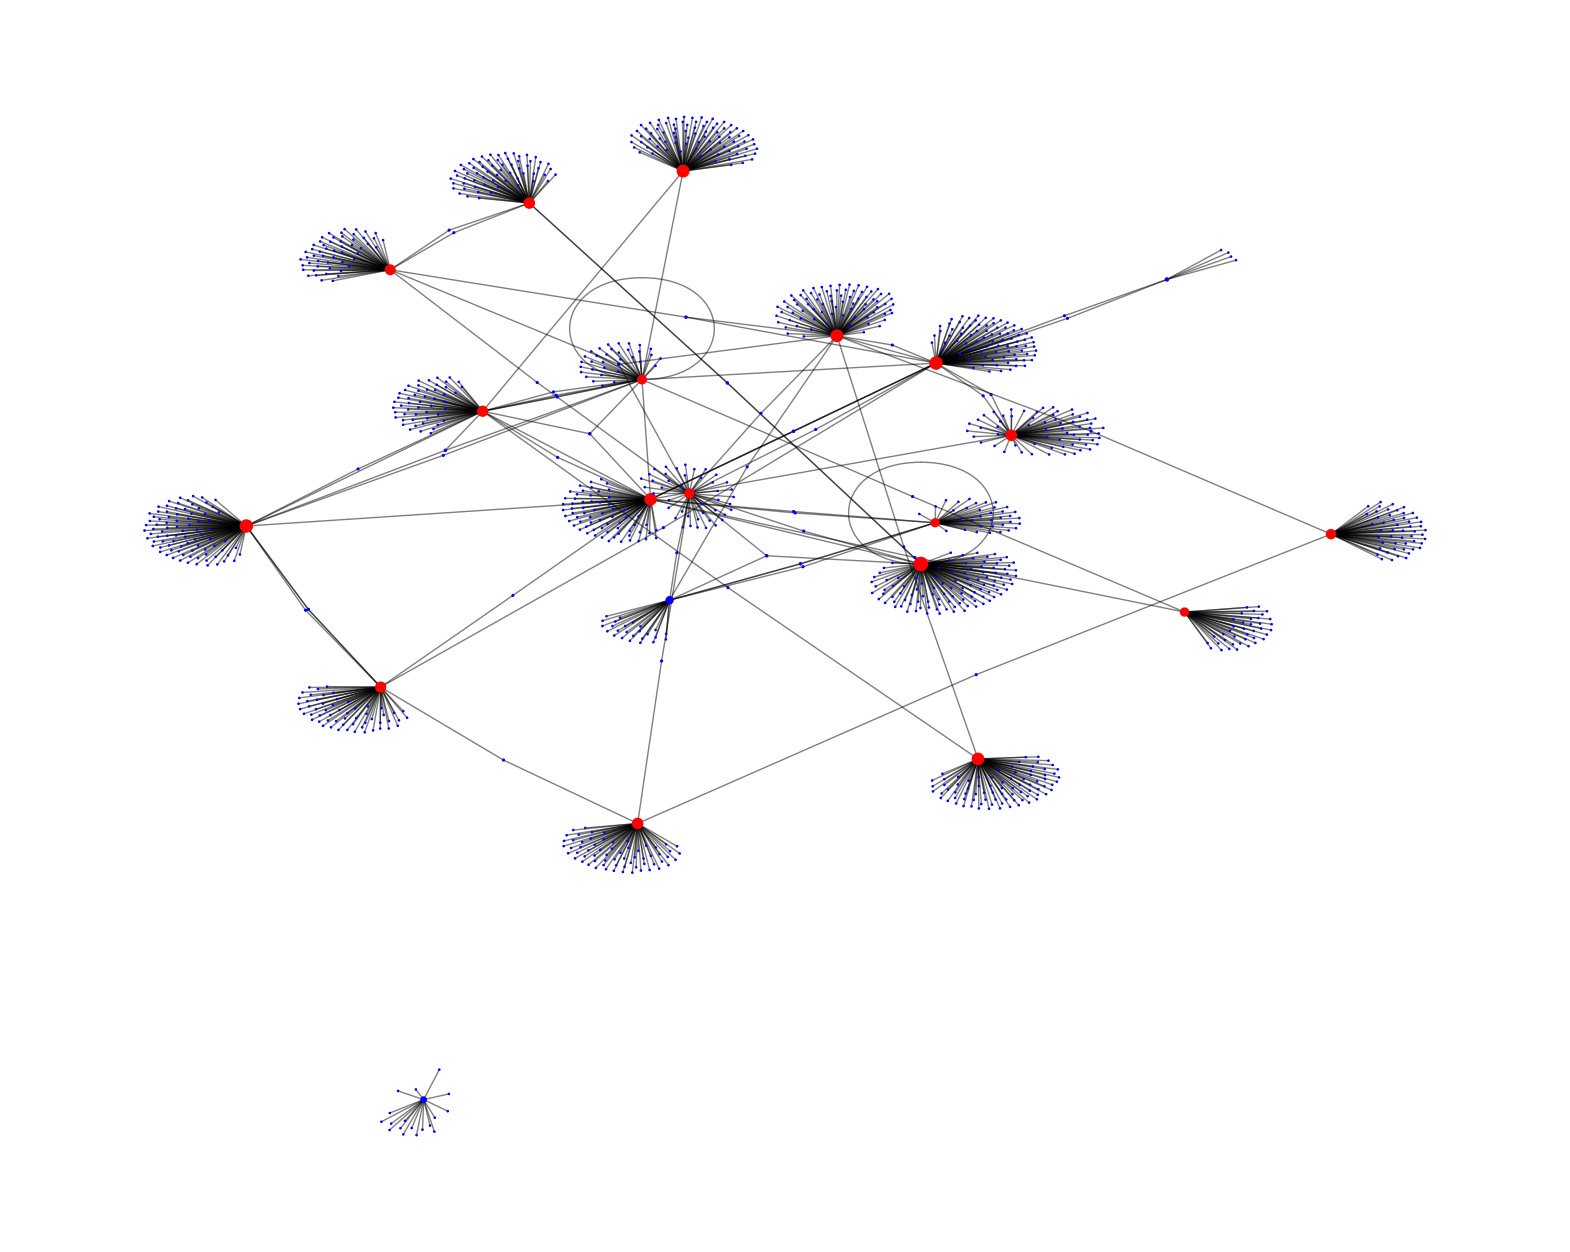

In [ ]:
# Visualize clustering and centrality results
pos = nx.spring_layout(G)
plt.figure(figsize=(20, 16))
nx.draw_networkx_nodes(G, pos, nodelist=cluster1_nodes, node_size=[s * 1000 for s in cluster1_centrality], node_color='r')
nx.draw_networkx_nodes(G, pos, nodelist=cluster2_nodes, node_size=[s * 1000 for s in cluster2_centrality], node_color='b')
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.axis('off')
plt.show()

In [ ]:
#accounts_info = get_account_info(accounts)

In [ ]:
'''

Based on web search results:

- @elonmusk: #Easter, #Tesla, #SpaceX, #Bitcoin, #Dogecoin
- @emilychangtv: #WWERaw, #WNBADraft, #NationalSiblingsDay, #Succession, #TwitterSold
- @jack: #TwitterTakeover, #CEOofTwitter, #Bitcoin, #Africa
- @kevinrose: #vegan, #fitness, #crypto, #ethereum, #podcast
- @ChuckRobbins: #MondayMotivation, #tbt, #traveltuesday, #CiscoLive, #CiscoImpact

You can also use tools like Trends24² or Hashtagify³ to find more trending hashtags on Twitter based on location, category, or popularity.

4/16/2023
(1) Best #elonmusk hashtags - Best Hashtag | best-hashtags.com. http://best-hashtags.com/hashtag/elonmusk/ Accessed 4/16/2023.
(2) Twitter under Elon Musk wakes up to help survivors of child sexual .... https://www.opindia.com/2022/11/killing-two-hashtags-was-needed-to-curb-child-exploitation-on-twitter-and-happened-after-elon-musk-took-over/ Accessed 4/16/2023.
(3) elon musk: Twitter abuzz with posts, memes, hashtags after Elon Musk .... https://economictimes.indiatimes.com/tech/tech-bytes/twitter-abuzz-with-posts-memes-hashtags-after-elon-musk-takeover/articleshow/91108575.cms Accessed 4/16/2023.
(4) The Ultimate List of Trending Hashtags on Every Platform (2023). https://influencermarketinghub.com/trending-hashtags/ Accessed 4/16/2023.
(5) How to Use Hashtags in 2023: A Guide for Every Network. https://blog.hootsuite.com/how-to-use-hashtags/ Accessed 4/16/2023.


'''

In [ ]:
!pip install --upgrade tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://twitter.com/explore/trending"

response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

trend_list = soup.find_all('span', {'class': 'css-901oao css-16my406 r-1qd0xha r-ad9z0x r-bcqeeo r-qvutc0'})

hashtags = []
for trend in trend_list:
    hashtag = trend.text.strip()
    if hashtag.startswith('#'):
        hashtags.append(hashtag)

print("Trending hashtags:")
for hashtag in hashtags:
    print(hashtag)

Trending hashtags:


In [ ]:
# Define the accounts and hashtags to collect posts from
influencers = ['elonmusk', 'emilychangtv', 'jack', 'kevinrose', 'ChuckRobbins']
hashtags = ['Easter', 'Tesla', 'SpaceX', 'Bitcoin', 'Dogecoin', 'WWERaw', 'WNBADraft', 'NationalSiblingsDay', 'Succession', 'TwitterSold', 'TwitterTakeover', 'CEOofTwitter', 'Africa', 'vegan', 'fitness', 'crypto', 'ethereum', 'podcast', 'MondayMotivation', 'tbt', 'traveltuesday', 'CiscoLive', 'CiscoImpact']


def collect_posts(accounts, hashtags):
    tweets = []
    for account in accounts:
        for hashtag in hashtags:
            #print(f"Collecting posts from {account} with hashtag #{hashtag}")
            for tweet in sntwitter.TwitterSearchScraper(f"from:{account} #{hashtag}").get_items():
                tweets.append((account, hashtag, tweet.content, tweet.likeCount, tweet.retweetCount, tweet.replyCount))

    df = pd.DataFrame(tweets, columns=['account', 'hashtag', 'tweet', 'likes', 'retweets', 'comments'])
    return df

In [ ]:
def get_hashtag_stats(influencer, hashtag):
    query = f'from:{influencer} #{hashtag}'

    total_followers = 0
    total_likes = 0
    total_retweets = 0
    total_comments = 0
    num_posts = 0

    for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
        if i >= 100:
            break

        total_followers += tweet.user.followersCount
        total_likes += tweet.likeCount
        total_retweets += tweet.retweetCount
        total_comments += tweet.replyCount + tweet.retweetCount
        num_posts += 1

    if num_posts > 0:
        avg_followers = total_followers / num_posts
        avg_likes = total_likes / num_posts
        avg_retweets = total_retweets / num_posts
        avg_comments = total_comments / num_posts

        stats = {
            influencer: {
                'num_posts': num_posts,
                'total_followers': total_followers,
                'avg_followers': avg_followers,
                'total_likes': total_likes,
                'avg_likes': avg_likes,
                'total_retweets': total_retweets,
                'avg_retweets': avg_retweets,
                'total_comments': total_comments,
                'avg_comments': avg_comments
            }
        }

        return stats
    else:
        return None

In [ ]:
import pandas as pd

def get_influencer_hashtag_stats(influencers, hashtags):
    results = []
    
    for influencer in influencers:
        for hashtag in hashtags:
            stats = get_hashtag_stats(influencer, hashtag)
            if stats:
                result = {'influencer': influencer, 'hashtag': hashtag, **stats[influencer]}
                results.append(result)
    
    df = pd.DataFrame(results)
    
    return df

In [ ]:
stats = get_influencer_hashtag_stats(influencers, hashtags)
stats

influencer          hashtag  num_posts  total_followers  avg_followers  \
0       elonmusk           SpaceX          1        135173517    135173517.0   
1       elonmusk          Bitcoin          1        135173476    135173476.0   
2   emilychangtv          Bitcoin          2           354878       177439.0   
3   emilychangtv         ethereum          1           177439       177439.0   
4   emilychangtv              tbt          4           709756       177439.0   
5           jack          Bitcoin         60        391720200      6528670.0   
6      kevinrose           SpaceX          1          1673021      1673021.0   
7      kevinrose          Bitcoin          8         13384168      1673021.0   
8      kevinrose         Dogecoin          3          5019063      1673021.0   
9   ChuckRobbins           Easter          2           133192        66596.0   
10  ChuckRobbins  TwitterTakeover          1            66596        66596.0   
11  ChuckRobbins        CiscoLive         32          2131072        66596.0   
12  ChuckRobbins      CiscoImpact          8           532768        66596.0   

    total_likes      avg_likes  total_retweets  avg_retweets  total_comments  \
0         74211   74211.000000           20707  20707.000000           22193   
1        201204  201204.000000           20057  20057.000000           73187   
2           939     469.500000              83     41.500000             135   
3            90      90.000000              12     12.000000              17   
4           191      47.750000              15      3.750000              28   
5        700284   11671.400000          133467   2224.450000          174094   
6            31      31.000000              20     20.000000              24   
7          2551     318.875000             295     36.875000             505   
8          1837     612.333333             235     78.333333             345   
9           725     362.500000              53     26.500000              71   
10          139     139.000000              37     37.000000              37   
11         4567     142.718750             910     28.437500             962   
12         4005     500.625000             456     57.000000             529   

    avg_comments  
0   22193.000000  
1   73187.000000  
2      67.500000  
3      17.000000  
4       7.000000  
5    2901.566667  
6      24.000000  
7      63.125000  
8     115.000000  
9      35.500000  
10     37.000000  
11     30.062500  
12     66.125000

In [ ]:
hot_hash = collect_posts(influencers, trending_hashtags)
hot_hash

<ipython-input-130-678b79876e1b>:12: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets.append((account, hashtag, tweet.content, tweet.likeCount, tweet.retweetCount, tweet.replyCount))


account hashtag                                              tweet  \
0         elonmusk      #1  @SmokeAwayyy With booster ultimately flying up...   
1         elonmusk      #1  Candle in rocket engine lasts ~0.1 sec\n\nAnal...   
2         elonmusk      #1  @BretWeinstein 1. Substack links were never bl...   
3         elonmusk      #1  @N__1__7 @Rainmaker1973 Yeah, above ground ups...   
4         elonmusk      #1  @PeterDiamandis @drmarkhyman I recommend havin...   
...            ...     ...                                                ...   
2354  ChuckRobbins      #3  Congrats! @Cisco innovations Catena and PLB wo...   
2355  ChuckRobbins      #3  Join me at 3:45pmPT on #Periscope for a quick ...   
2356  ChuckRobbins      #3  @zkerravala I agree with your suggestions....!...   
2357  ChuckRobbins      #3  Proud that Cisco was named #3 on the top 25 te...   
2358  ChuckRobbins      #3  I am trying to figure out how UNC is #19/Duke ...   

      likes  retweets  comments  
0     27892      2804      2900  
1     59661      4117      2926  
2      5715      1123      1258  
3      1412       103       218  
4      1743       115       244  
...     ...       ...       ...  
2354     60        20         3  
2355     30        10         1  
2356      4         1         0  
2357     86       120         5  
2358      0         0         0  

[2359 rows x 6 columns]

In [ ]:
import re
import collections
import pandas as pd
import snscrape.modules.twitter as sntwitter

def get_trending_hashtags(accounts, num_tweets):
    hashtags = []
    for account in accounts:
        # Scrape the account's timeline for tweets
        for i, tweet in enumerate(sntwitter.TwitterUserScraper(account).get_items()):
            if i >= num_tweets:
                break
            # Extract the hashtags from the tweet text using regular expressions
            tweet_hashtags = re.findall(r'\#\w+', tweet.content)
            hashtags.extend(tweet_hashtags)
    # Calculate the frequency of each hashtag in the list
    counter = collections.Counter(hashtags)
    # Create a dataframe with the hashtag and frequency columns
    df = pd.DataFrame(counter.items(), columns=['Hashtag', 'Frequency'])
    # Sort the dataframe by frequency in descending order
    df = df.sort_values(by='Frequency', ascending=False)
    # Return the top 10 hashtags
    return df.head(10)['Hashtag'].tolist()

In [ ]:
accounts = ['elonmusk', 'emilychangtv', 'jack', 'kevinrose', 'ChuckRobbins']
num_tweets = 100
trending_hashtags = get_trending_hashtags(accounts, num_tweets)
print(trending_hashtags)

<ipython-input-118-9eb2ec6c1321>:14: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweet_hashtags = re.findall(r'\#\w+', tweet.content)


['#PS22', '#1', '#WEF23', '#cybersecurity', '#GPTW', '#WeAreCisco', '#MWC23', '#nostr', '#dreamforce', '#3']


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

def analyze_sentiment(influencer_name, posts_df, hashtag=None):
    # Filter posts_df by influencer name and hashtag (if specified)
    mask = (posts_df['account'] == influencer_name) & (posts_df['tweet'].str.contains(hashtag) if hashtag else True)
    influencer_posts = posts_df.loc[mask, 'tweet'].tolist()
    
    # Initialize SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()
    
    # Analyze sentiment for each post and add to a list
    post_scores = []
    for post in influencer_posts:
        scores = sia.polarity_scores(post)
        post_scores.append({'positive_score': scores['pos'], 'negative_score': scores['neg']})
    
    # Merge post scores and engagement data
    results_df = pd.DataFrame(post_scores)
    results_df[['likes', 'retweets', 'comments']] = posts_df.loc[mask, ['likes', 'retweets', 'comments']]
    
    # Calculate total engagement for each post
    results_df['total_engagement'] = results_df['likes'] + results_df['retweets'] + results_df['comments']
    
    # Rank posts by engagement and reset index
    results_df = results_df.sort_values(by='total_engagement', ascending=False).reset_index(drop=True)
    
    return results_df

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
sentiment_results = analyze_sentiment('elonmusk', hot_hash)
sentiment_results

positive_score  negative_score   likes  retweets  comments  \
0             0.438           0.105  603592     43896     41979   
1             0.101           0.052  524158     90076     32741   
2             0.101           0.052  524158     90076     32741   
3             0.000           0.000  504904    106008     33885   
4             0.047           0.201  505599     44500     37956   
..              ...             ...     ...       ...       ...   
693           0.174           0.057      18         6         4   
694           0.000           0.000      12         6         8   
695           0.000           0.000      14         5         2   
696           0.000           0.000      14         5         2   
697           0.272           0.000       8         3         6   

     total_engagement  
0              689467  
1              646975  
2              646975  
3              644797  
4              588055  
..                ...  
693                28  
694                26  
695                21  
696                21  
697                17  

[698 rows x 6 columns]

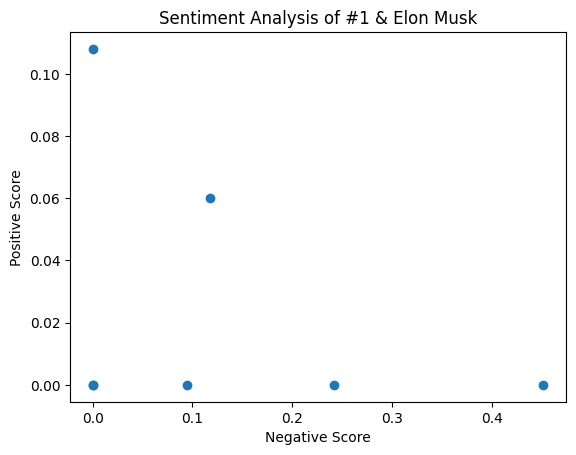

In [ ]:
influencer_sentiment_df = analyze_sentiment('elonmusk', hot_hash, hashtag='#1')

# Create scatter plot
plt.scatter(influencer_sentiment_df['negative_score'], influencer_sentiment_df['positive_score'])
plt.title(f"Sentiment Analysis of #1 & Elon Musk")
plt.xlabel('Negative Score')
plt.ylabel('Positive Score')
plt.show()

In [ ]:
def plot_influencer_stats_bar(influencer_stats_df):
    # Create bar plot
    ax = influencer_stats_df.plot(kind='bar', x='influencer', y=['total_likes', 'total_followers', 'num_posts'])
    ax.set_title('Influencer Stats')
    ax.set_xlabel('Influencer')
    ax.set_ylabel('Number')
    plt.show()

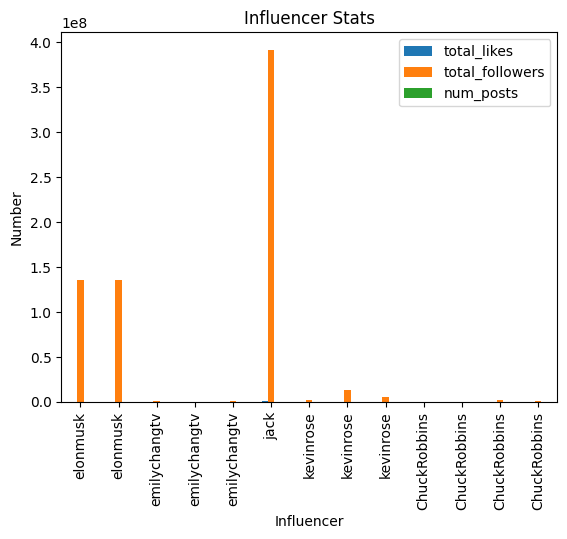

In [ ]:
plot_influencer_stats_bar(stats)

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('stopwords')

def generate_wordcloud(influencer_name, hashtag, posts_df):
    # Filter posts_df by influencer name and hashtag
    influencer_posts = posts_df[(posts_df['account'] == influencer_name) & (posts_df['hashtag'] == hashtag)]['tweet'].tolist()

    # Preprocess text
    stop_words = set(stopwords.words('english') + list(STOPWORDS))
    preprocess = lambda text: ' '.join([word for word in text.lower().split() if word not in stop_words and word.isalpha()])
    influencer_posts = [preprocess(post) for post in influencer_posts]

    # Perform sentiment analysis
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = [sia.polarity_scores(post) for post in influencer_posts]
    sentiment_df = pd.DataFrame(sentiment_scores)

    # Combine sentiment scores with word frequency
    word_frequency = {}
    for post in influencer_posts:
        for word in post.split():
            if word not in stop_words and word.isalpha():
                if word in word_frequency:
                    word_frequency[word] += 1
                else:
                    word_frequency[word] = 1
    word_df = pd.DataFrame.from_dict(word_frequency, orient='index', columns=['frequency'])
    word_sentiment_df = pd.concat([word_df, sentiment_df], axis=1)

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(word_frequency)

    # Plot the word cloud
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


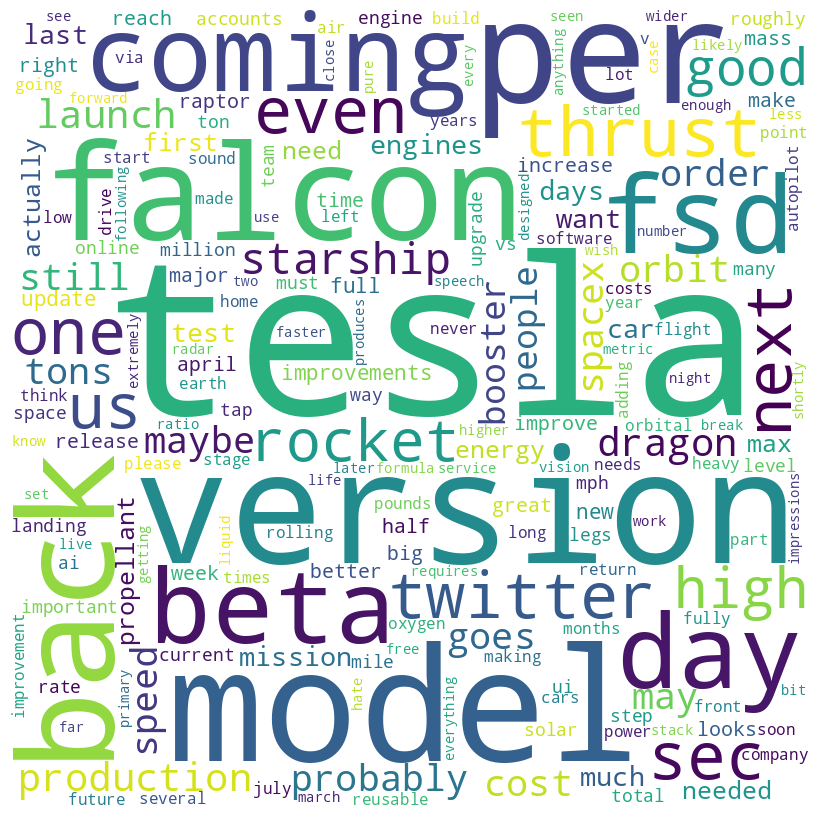

In [ ]:
generate_wordcloud('elonmusk', '#1', hot_hash)